# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In order to analyze our data, my plan is to locate and load our data source into a workable format. For JSON data, we could use pandas for any data wrangling and numpy for any additional data manipulation. Matplotlib would be used for any visual analysis.

In [1]:
# Import dependencies for analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

logins.json
ultimate_data_challenge.json
ultimate_data_science_challenge (1).pdf
ultimate_technologies_inc_take_home_challenge.ipynb


In [3]:
# File of interest for Part 1
logins_file = "logins.json"

In [4]:
# Loading logins file as pandas DataFrame
logins_df = pd.read_json(logins_file)

In [5]:
# Checking data structure
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
# Checking data structure
logins_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [7]:
# Checking data type
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Up to now, we could see that the timestamps seems to be out of order (see index 2 and 3 and index 93137 and 93138). In order to visualize login data chronologically, we would want to order it from the earliest to the latest entry. This can be done using panda's sort_values.

In [8]:
# Sort login_times
logins_df = logins_df.sort_values(by='login_time')

In [9]:
logins_df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [10]:
logins_df.tail()

,login_time
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23
93140,1970-04-13 18:57:38


With the entry now in chronological order, we could use it as our index. Any additional data columns (such as login counts based on time intervals) could be created through data aggregation.

In [11]:
# Set login_time as index
logins_df.set_index('login_time', inplace=True)

In [12]:
# Checking data structure
logins_df.head()

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37


In [13]:
# Checking DataFrame info
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Empty DataFrame

While the DataFrame is now empty, we still have our timestep entries. Using grouper and groupby, we could generate a new DataFrame index with 15 minute intervals, then use size to count the number of logins between each interval.

In [14]:
# Grouping timestamp into 15 minute intervals
logins_df_15min = logins_df.groupby([pd.Grouper(freq='15Min')]).sum()

# Generating count column
logins_df_15min['count'] = logins_df.groupby([pd.Grouper(freq='15Min')]).size()

# Checking data structure
logins_df_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [15]:
# Sanity check for number of occurrences, count should be 2, 6, 9,
# respectively
logins_df.head(18)

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37
1970-01-01 20:21:41
1970-01-01 20:26:05
1970-01-01 20:26:21
1970-01-01 20:31:03


For our analysis, the day of the week might be of interest if we're monitoring login traffic. We'll include this in our DataFrame.

In [16]:
# Include day of week
logins_df_15min['day of week'] = logins_df_15min.index.day_name()

# Include day of week in numeric form (Monday starts at 0)
logins_df_15min['weekday'] = logins_df_15min.index.weekday

# Checking data structure
logins_df_15min.head()

,count,day of week,weekday
login_time,,,
1970-01-01 20:00:00,2,Thursday,3
1970-01-01 20:15:00,6,Thursday,3
1970-01-01 20:30:00,9,Thursday,3
1970-01-01 20:45:00,7,Thursday,3
1970-01-01 21:00:00,1,Thursday,3


In [17]:
# Checking data structure
logins_df_15min.tail()

,count,day of week,weekday
login_time,,,
1970-04-13 17:45:00,5,Monday,0
1970-04-13 18:00:00,5,Monday,0
1970-04-13 18:15:00,2,Monday,0
1970-04-13 18:30:00,7,Monday,0
1970-04-13 18:45:00,6,Monday,0


Now that we have our data, we could first check the overall login statistics.

In [18]:
# Overall login statistics
logins_df_15min['count'].describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: count, dtype: float64

We could also check the overall login statistics by day of week. We can aggregate the data using groupby and use describe.

In [19]:
# Overall statistics based on day of week
login_statistics = logins_df_15min.groupby('weekday').describe()
login_statistics

count                                                  
          count       mean        std  min  25%   50%   75%   max
weekday                                                          
0        1420.0   6.213380   5.029465  0.0  3.0   5.0   8.0  37.0
1        1344.0   6.895833   6.264071  0.0  2.0   5.0   9.0  53.0
2        1344.0   7.692708   6.567372  0.0  3.0   6.0  11.0  60.0
3        1360.0   8.794118   7.058483  0.0  3.0   7.0  13.0  45.0
4        1440.0  10.561111   8.172082  0.0  5.0   9.0  15.0  55.0
5        1440.0  13.456250  10.357784  0.0  6.0  11.0  19.0  66.0
6        1440.0  12.615972  10.091680  0.0  5.0  10.0  17.0  73.0

In [20]:
# We'll rename weekday with their actual names
weekday_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',
                4:'Friday',5:'Saturday',6:'Sunday'}

login_statistics = login_statistics.rename(index=weekday_dict)
login_statistics

count                                                  
            count       mean        std  min  25%   50%   75%   max
weekday                                                            
Monday     1420.0   6.213380   5.029465  0.0  3.0   5.0   8.0  37.0
Tuesday    1344.0   6.895833   6.264071  0.0  2.0   5.0   9.0  53.0
Wednesday  1344.0   7.692708   6.567372  0.0  3.0   6.0  11.0  60.0
Thursday   1360.0   8.794118   7.058483  0.0  3.0   7.0  13.0  45.0
Friday     1440.0  10.561111   8.172082  0.0  5.0   9.0  15.0  55.0
Saturday   1440.0  13.456250  10.357784  0.0  6.0  11.0  19.0  66.0
Sunday     1440.0  12.615972  10.091680  0.0  5.0  10.0  17.0  73.0

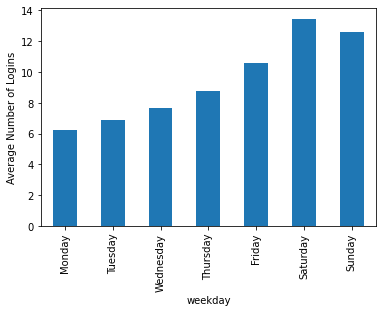

In [21]:
login_statistics[('count','mean')].plot.bar()
plt.ylabel('Average Number of Logins')
plt.show()

From this, we could see that average login activity picks up slowly early week and peaks during the weekend, of which activity would drop off to its lowest the following Monday. This forms the average weekly pattern.

Before we obverse daily trends, we could visualize weekly trends using the full dataset.

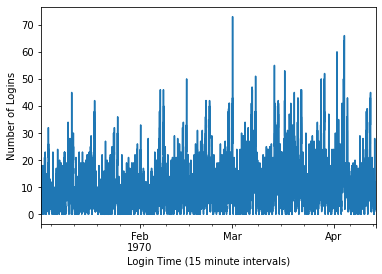

In [22]:
# Plotting login data for the full dataset
logins_df_15min['count'].plot.line()
plt.xlabel('Login Time (15 minute intervals)')
plt.ylabel('Number of Logins')
plt.show()

From the full dataset, the weekly pattern could be seen throughout the time series. This likely corresponds to the work-week, where people would have more time to do things during the weekend than they would at other times. We could check this by checking the data for the first full week of the dataset (Jan 5 to Jan 11).

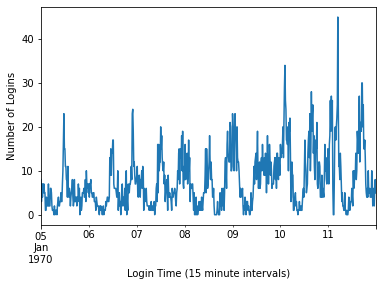

In [23]:
# Plotting login data for the full dataset
logins_df_15min['count']['1970-01-05':'1970-01-11'].plot.line()
plt.xlabel('Login Time (15 minute intervals)')
plt.ylabel('Number of Logins')
plt.show()

Weekly trends that break from this likely occur due to holidays. This could be checked by checking the holidays observed that year.

What we did with the weekly data (averaging based on day of week), we could do to daily data (averaging based on hour of day).

In [24]:
# Include hour of day
logins_df_15min['hour of day'] = logins_df_15min.index.hour
logins_df_15min.head()

,count,day of week,weekday,hour of day
login_time,,,,
1970-01-01 20:00:00,2,Thursday,3,20
1970-01-01 20:15:00,6,Thursday,3,20
1970-01-01 20:30:00,9,Thursday,3,20
1970-01-01 20:45:00,7,Thursday,3,20
1970-01-01 21:00:00,1,Thursday,3,21


In [25]:
# Overall statistics based on hour of day (Monday)
logins_df_15min_mini = logins_df_15min[['count', 'day of week', 'hour of day']]
login_statistics_mon = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Monday'].groupby('hour of day').describe()
login_statistics_mon

count                                                    
            count       mean       std  min    25%   50%    75%   max
hour of day                                                          
0            60.0   8.850000  4.011952  2.0   6.00   8.0  11.00  23.0
1            60.0   6.900000  3.023636  1.0   5.00   6.5   8.00  16.0
2            60.0   5.200000  3.235397  1.0   3.00   5.0   6.25  16.0
3            60.0   3.933333  2.530269  0.0   2.00   3.0   6.00  11.0
4            60.0   3.433333  2.546960  0.0   2.00   3.0   4.25  14.0
5            60.0   2.016667  2.119255  0.0   1.00   1.0   2.25  12.0
6            60.0   1.100000  1.100077  0.0   0.00   1.0   2.00   4.0
7            60.0   1.850000  1.527433  0.0   1.00   1.0   3.00   6.0
8            60.0   2.450000  1.925960  0.0   1.00   2.0   3.25  11.0
9            60.0   4.266667  2.615901  1.0   2.00   4.0   5.00  12.0
10           60.0   9.300000  4.868787  2.0   5.75   8.0  13.00  22.0
11           60.0  15.783333  6.923533  1.0  11.00  15.5  20.25  37.0
12           60.0  12.033333  5.556998  2.0   8.75  11.0  14.25  30.0
13           60.0   7.100000  3.398404  2.0   5.00   6.0   9.00  22.0
14           60.0   5.616667  2.662302  1.0   3.75   6.0   7.00  13.0
15           60.0   4.883333  2.737633  1.0   3.00   4.0   6.00  13.0
16           60.0   4.150000  2.583028  0.0   2.00   4.0   6.00  10.0
17           60.0   3.966667  2.224415  0.0   2.00   4.0   5.25   9.0
18           60.0   4.450000  2.037155  0.0   3.00   4.0   6.00  10.0
19           56.0   4.678571  2.880070  0.0   3.00   4.0   6.25  14.0
20           56.0   6.714286  3.591476  1.0   4.00   6.0   9.00  17.0
21           56.0  10.803571  4.510270  1.0   7.00  10.5  13.25  22.0
22           56.0  10.910714  4.648663  3.0   7.75  11.0  14.00  28.0
23           56.0   9.500000  5.433900  3.0   7.00   8.0  11.00  37.0

In [26]:
login_statistics_tues = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Tuesday'].groupby('hour of day').describe()
login_statistics_tues

count                                                    
            count       mean       std  min    25%   50%    75%   max
hour of day                                                          
0            56.0  10.839286  7.586535  4.0   6.75   9.0  12.00  42.0
1            56.0  10.107143  9.012473  2.0   6.00   8.0  10.25  53.0
2            56.0   7.035714  6.779553  0.0   4.00   5.0   7.25  30.0
3            56.0   3.535714  2.689808  0.0   2.00   3.0   5.00  18.0
4            56.0   2.660714  2.108656  0.0   1.00   2.0   4.00   9.0
5            56.0   2.017857  1.783674  0.0   1.00   2.0   3.00   9.0
6            56.0   0.821429  0.811444  0.0   0.00   1.0   1.00   3.0
7            56.0   1.142857  1.034471  0.0   0.00   1.0   2.00   4.0
8            56.0   1.571429  1.332900  0.0   1.00   1.0   2.00   6.0
9            56.0   4.321429  2.328536  0.0   3.00   4.0   6.00  14.0
10           56.0   8.553571  4.693979  2.0   5.00   8.0  10.00  28.0
11           56.0  18.125000  4.850726  9.0  14.00  19.0  21.25  30.0
12           56.0  12.678571  4.865863  4.0   9.00  13.0  16.00  26.0
13           56.0   6.446429  2.358117  2.0   5.00   6.0   8.00  13.0
14           56.0   5.517857  2.389302  1.0   4.00   5.0   7.00  11.0
15           56.0   4.410714  3.001677  0.0   3.00   4.0   5.00  18.0
16           56.0   3.910714  2.414176  0.0   2.00   4.0   6.00   9.0
17           56.0   3.267857  2.119100  0.0   2.00   3.0   5.00   9.0
18           56.0   5.410714  2.599138  0.0   3.00   6.0   7.00  12.0
19           56.0   5.375000  3.513933  0.0   3.00   4.5   7.00  16.0
20           56.0   8.714286  4.305237  1.0   5.75   8.0  11.25  19.0
21           56.0  12.571429  4.724625  4.0   9.00  12.0  15.00  23.0
22           56.0  13.535714  7.081254  1.0   9.00  12.0  17.00  31.0
23           56.0  12.928571  5.796103  2.0   8.75  12.0  16.25  27.0

In [27]:
login_statistics_wed = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Wednesday'].groupby('hour of day').describe()
login_statistics_wed

count                                                    
            count       mean       std  min    25%   50%    75%   max
hour of day                                                          
0            56.0  12.267857  5.306912  2.0   9.00  12.0  15.00  27.0
1            56.0  12.250000  4.995452  4.0   8.75  13.0  16.00  23.0
2            56.0   8.607143  4.483013  0.0   5.75   8.0  11.00  23.0
3            56.0   5.339286  3.163869  1.0   3.00   5.0   7.00  15.0
4            56.0   4.375000  2.416327  0.0   3.00   4.0   6.00  11.0
5            56.0   2.410714  2.286536  0.0   1.00   2.0   4.00  11.0
6            56.0   0.857143  0.882735  0.0   0.00   1.0   1.00   3.0
7            56.0   1.500000  1.235829  0.0   0.75   1.0   2.00   4.0
8            56.0   1.767857  1.279077  0.0   1.00   2.0   2.00   6.0
9            56.0   4.285714  2.674555  0.0   2.00   4.0   6.00  12.0
10           56.0   9.071429  4.678217  0.0   6.00   8.5  12.00  24.0
11           56.0  18.875000  7.316389  7.0  13.00  18.5  23.00  37.0
12           56.0  13.071429  4.953813  4.0   9.75  13.0  16.00  30.0
13           56.0   7.571429  2.709291  3.0   5.75   7.0   9.00  16.0
14           56.0   5.696429  2.696258  1.0   4.00   5.0   7.00  11.0
15           56.0   4.696429  2.295606  0.0   3.00   4.0   6.00  11.0
16           56.0   3.821429  1.849886  0.0   3.00   4.0   5.00   8.0
17           56.0   3.428571  2.130789  0.0   2.00   3.0   4.00  12.0
18           56.0   5.125000  3.162637  0.0   3.00   5.0   7.00  14.0
19           56.0   5.464286  4.212381  0.0   2.00   4.5   7.25  18.0
20           56.0   8.928571  4.831176  0.0   5.00   8.0  12.00  20.0
21           56.0  13.196429  5.593567  4.0   8.00  12.0  16.25  29.0
22           56.0  15.803571  6.233107  2.0  12.00  15.0  19.00  41.0
23           56.0  16.214286  9.231791  5.0   9.75  13.0  21.00  60.0

In [28]:
login_statistics_thurs = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Thursday'].groupby('hour of day').describe()
login_statistics_thurs

count                                                    
            count       mean       std  min    25%   50%    75%   max
hour of day                                                          
0            56.0  14.571429  5.332089  6.0  11.75  14.0  17.00  29.0
1            56.0  13.875000  7.125020  5.0   9.00  11.0  15.00  36.0
2            56.0  11.160714  6.384005  3.0   6.00  10.0  13.00  31.0
3            56.0   6.696429  4.212189  1.0   4.00   6.0   8.25  20.0
4            56.0   4.553571  2.456306  0.0   3.00   5.0   6.00  13.0
5            56.0   2.428571  2.564493  0.0   1.00   2.0   3.25  12.0
6            56.0   1.196429  1.393748  0.0   0.00   1.0   2.00   6.0
7            56.0   1.446429  1.060354  0.0   1.00   1.0   2.00   4.0
8            56.0   1.696429  1.661540  0.0   0.00   1.5   3.00   6.0
9            56.0   4.482143  2.676436  0.0   2.00   4.0   6.00  11.0
10           56.0  10.321429  4.281491  3.0   7.75  10.0  13.25  22.0
11           56.0  19.589286  6.776367  5.0  15.00  19.0  24.00  35.0
12           56.0  14.714286  5.129998  6.0  11.00  13.0  18.00  30.0
13           56.0   8.642857  2.746426  2.0   7.75   8.0  10.00  17.0
14           56.0   6.928571  3.706786  1.0   4.00   6.0   9.25  17.0
15           56.0   5.000000  3.547086  0.0   2.00   4.0   8.00  17.0
16           56.0   4.321429  2.841940  0.0   2.75   4.0   5.25  16.0
17           56.0   4.142857  3.249775  0.0   2.00   3.5   5.00  15.0
18           56.0   6.267857  3.896344  0.0   3.00   6.0   8.00  21.0
19           56.0   7.000000  3.526523  1.0   4.00   7.0   9.00  17.0
20           60.0  10.366667  4.075419  0.0   7.00  10.5  13.00  18.0
21           60.0  14.500000  6.157536  0.0  11.00  15.0  18.00  33.0
22           60.0  18.150000  6.545344  1.0  14.00  19.0  21.25  33.0
23           60.0  17.216667  6.139872  9.0  13.75  17.0  19.00  45.0

In [29]:
login_statistics_fri = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Friday'].groupby('hour of day').describe()
login_statistics_fri

count                                                     
            count       mean        std  min    25%   50%    75%   max
hour of day                                                           
0            60.0  16.250000   5.741980  6.0  11.75  17.0  20.00  34.0
1            60.0  15.950000   5.915865  6.0  11.00  16.0  20.25  31.0
2            60.0  12.850000   4.221916  5.0  10.00  13.0  15.00  27.0
3            60.0   8.366667   3.659057  1.0   6.00   8.0  10.00  20.0
4            60.0   5.883333   3.304294  0.0   4.00   5.0   7.00  19.0
5            60.0   4.083333   2.787938  0.0   2.00   4.0   5.25  13.0
6            60.0   2.016667   1.599700  0.0   1.00   2.0   3.00   5.0
7            60.0   1.750000   1.229924  0.0   1.00   1.5   3.00   5.0
8            60.0   1.816667   1.478566  0.0   1.00   1.5   3.00   5.0
9            60.0   4.000000   2.792241  0.0   2.00   4.0   5.25  12.0
10           60.0   8.783333   4.239010  2.0   6.00   8.0  11.00  21.0
11           60.0  16.983333   5.160120  7.0  14.00  16.0  20.25  33.0
12           60.0  15.433333   6.793234  5.0  11.00  14.5  18.00  41.0
13           60.0   8.883333   4.310380  2.0   6.00   8.5  10.25  26.0
14           60.0   8.700000   3.665228  3.0   6.00   8.0  11.00  21.0
15           60.0   6.500000   3.432151  1.0   4.00   6.0   8.00  16.0
16           60.0   6.200000   2.915767  2.0   4.00   6.0   7.25  14.0
17           60.0   8.000000   5.272249  1.0   5.00   6.0  10.00  32.0
18           60.0   9.616667   4.885439  0.0   6.00   8.0  13.00  23.0
19           60.0  10.966667   5.871409  2.0   7.00   9.5  13.00  31.0
20           60.0  13.383333   5.424651  2.0  10.00  13.0  16.00  28.0
21           60.0  20.100000   8.863752  4.0  13.00  18.0  25.00  45.0
22           60.0  25.316667  10.112070  6.0  18.00  24.5  32.00  55.0
23           60.0  21.633333   8.881454  8.0  14.75  22.0  27.00  47.0

In [30]:
login_statistics_sat = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Saturday'].groupby('hour of day').describe()
login_statistics_sat

count                                                      
            count       mean        std   min    25%   50%    75%   max
hour of day                                                            
0            60.0  20.900000   8.932326   5.0  16.00  19.0  24.25  53.0
1            60.0  26.033333  12.016890  10.0  17.00  24.0  30.00  64.0
2            60.0  26.800000   7.175287   7.0  22.00  27.0  31.25  43.0
3            60.0  26.233333   9.730899   8.0  18.75  24.0  34.25  47.0
4            60.0  28.650000  10.331497  10.0  21.00  29.0  35.00  59.0
5            60.0  18.216667  13.358285   3.0   9.00  15.0  23.25  66.0
6            60.0   6.800000   6.329377   1.0   3.00   6.0   8.00  45.0
7            60.0   2.966667   2.239602   0.0   2.00   2.0   4.00  12.0
8            60.0   2.116667   1.957962   0.0   1.00   2.0   3.00   9.0
9            60.0   1.966667   1.437591   0.0   1.00   2.0   3.00   7.0
10           60.0   3.400000   2.505587   0.0   2.00   3.0   5.00  11.0
11           60.0   6.200000   3.621031   0.0   3.00   5.0   8.00  19.0
12           60.0   8.800000   3.606961   3.0   6.00   8.0  11.00  17.0
13           60.0  11.316667   4.504204   2.0   7.00  11.5  14.00  24.0
14           60.0  12.750000   5.274258   5.0   9.00  12.0  16.00  31.0
15           60.0  12.716667   5.831218   2.0   8.00  13.0  17.00  28.0
16           60.0  11.966667   5.882945   2.0   7.00  11.0  15.00  27.0
17           60.0  10.683333   5.990081   3.0   6.75   9.0  12.25  33.0
18           60.0  10.633333   5.262489   1.0   6.00  10.0  14.25  24.0
19           60.0  11.400000   4.978598   4.0   8.00  10.0  15.00  24.0
20           60.0  11.700000   5.878141   2.0   6.75  11.0  16.00  25.0
21           60.0  14.566667   6.880005   4.0   9.00  13.0  20.25  34.0
22           60.0  19.366667   7.577770   5.0  13.75  17.0  25.00  39.0
23           60.0  16.766667   5.615857   7.0  13.00  17.0  20.25  33.0

In [31]:
login_statistics_sun = logins_df_15min_mini[logins_df_15min_mini['day of week'] == 'Sunday'].groupby('hour of day').describe()
login_statistics_sun

count                                                      
            count       mean        std   min    25%   50%    75%   max
hour of day                                                            
0            60.0  18.716667   6.732395   7.0  14.00  17.0  23.00  36.0
1            60.0  22.583333   7.376765   7.0  16.75  23.0  27.00  46.0
2            60.0  26.800000   9.614255   0.0  20.75  27.0  32.00  50.0
3            60.0  27.450000   8.458122   8.0  21.00  27.0  34.00  46.0
4            60.0  35.116667  10.675636  13.0  27.00  35.0  42.25  73.0
5            60.0  18.366667   9.945558   5.0  10.75  15.5  24.00  47.0
6            60.0   6.366667   3.705089   0.0   3.75   6.5   9.00  16.0
7            60.0   3.200000   2.023590   0.0   2.00   3.0   5.00   8.0
8            60.0   2.550000   2.078339   0.0   1.00   2.0   3.00   9.0
9            60.0   3.000000   2.712182   0.0   1.00   2.0   4.25  12.0
10           60.0   3.500000   2.382848   1.0   1.75   3.0   4.25  10.0
11           60.0   4.866667   3.170129   0.0   3.00   4.0   7.00  13.0
12           60.0   8.700000   4.662508   1.0   5.00   8.0  11.25  21.0
13           60.0  11.733333   5.348425   2.0   8.00  11.5  15.00  24.0
14           60.0  13.100000   5.235796   3.0   9.00  13.0  16.00  24.0
15           60.0  13.366667   4.769133   5.0  10.75  13.0  17.00  27.0
16           60.0  13.633333   6.147803   2.0   9.75  13.0  17.50  30.0
17           60.0  10.300000   5.630727   2.0   6.00   9.5  13.25  30.0
18           60.0   9.283333   4.104944   2.0   6.75   8.5  12.00  20.0
19           60.0  10.533333   4.597223   3.0   7.00  10.5  14.00  20.0
20           60.0  10.200000   5.565633   2.0   6.00  10.0  13.25  29.0
21           60.0  10.416667   4.819774   3.0   7.00  10.0  13.25  20.0
22           60.0   9.716667   4.540185   0.0   7.00   9.5  11.50  23.0
23           60.0   9.283333   4.569952   2.0   6.00   9.0  11.25  23.0

In [32]:
# Collect daily means into one DataFrame
login_statistics_daily = pd.concat([login_statistics_mon[('count','mean')],
                                    login_statistics_tues[('count','mean')],
                                    login_statistics_wed[('count','mean')],
                                    login_statistics_thurs[('count','mean')],
                                    login_statistics_fri[('count','mean')],
                                    login_statistics_sat[('count','mean')],
                                    login_statistics_sun[('count','mean')],], axis='columns')

# Create list to rename columns
name_list = ['Monday mean',
             'Tuesday mean',
             'Wednesday mean',
             'Thursday mean',
             'Friday mean',
             'Saturday mean',
             'Sunday mean']

# Rename columns
login_statistics_daily.columns = name_list
login_statistics_daily

,Monday mean,Tuesday mean,Wednesday mean,Thursday mean,Friday mean,Saturday mean,Sunday mean
hour of day,,,,,,,
0,8.850000,10.839286,12.267857,14.571429,16.250000,20.900000,18.716667
1,6.900000,10.107143,12.250000,13.875000,15.950000,26.033333,22.583333
2,5.200000,7.035714,8.607143,11.160714,12.850000,26.800000,26.800000
3,3.933333,3.535714,5.339286,6.696429,8.366667,26.233333,27.450000
4,3.433333,2.660714,4.375000,4.553571,5.883333,28.650000,35.116667
5,2.016667,2.017857,2.410714,2.428571,4.083333,18.216667,18.366667
6,1.100000,0.821429,0.857143,1.196429,2.016667,6.800000,6.366667
7,1.850000,1.142857,1.500000,1.446429,1.750000,2.966667,3.200000
8,2.450000,1.571429,1.767857,1.696429,1.816667,2.116667,2.550000


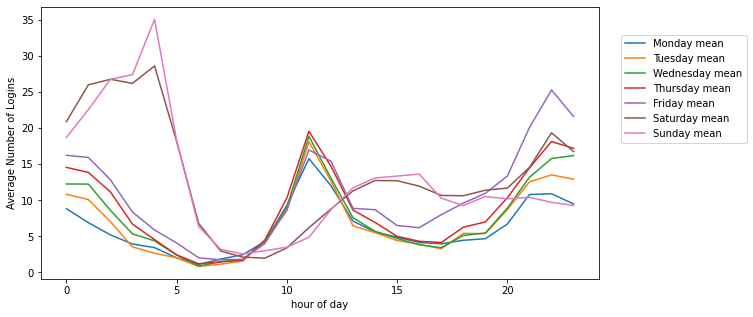

In [33]:
# Plotting hourly trends for each weekday
login_statistics_daily.plot.line(figsize=(10, 5))
plt.legend(loc=(1.04,0.5))
plt.ylabel('Average Number of Logins')
plt.show()

Here, we see the two average weekend trends follow a slightly different pattern than the average weekday trends.

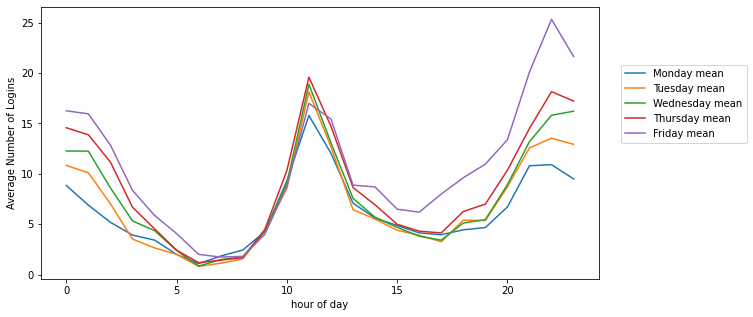

In [34]:
# Plotting hourly trend for Monday to Friday
login_statistics_daily[['Monday mean','Tuesday mean','Wednesday mean','Thursday mean','Friday mean']].plot.line(figsize=(10, 5))
plt.legend(loc=(1.04,0.5))
plt.ylabel('Average Number of Logins')
plt.show()

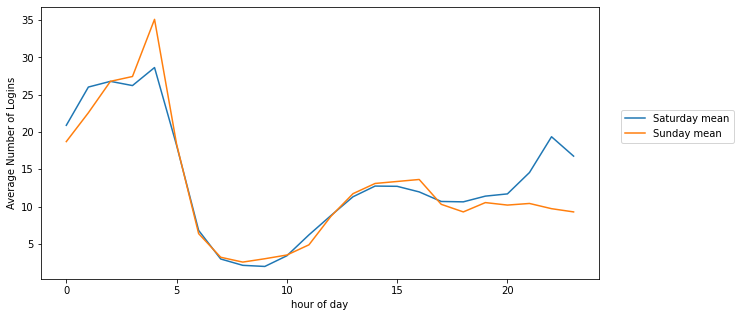

In [35]:
# Plotting hourly trend for weekends
login_statistics_daily[['Saturday mean','Sunday mean']].plot.line(figsize=(10, 5))
plt.legend(loc=(1.04,0.5))
plt.ylabel('Average Number of Logins')
plt.show()

In the hourly trends, we can see that from Monday to Friday, there are two periods when login activity peaks, around noon and around 9-10 PM at night. This trend is different during the weekend with most of the people's activity happening around 4-5 AM in the morning. In the afternoon, the weekend trends break from one another, where a second activity peak occurs similar to the weekdays during Saturday, but lulls for Sunday. It is likely this is where activity drops off before transitioning to the following Monday.

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a) how you will implement the experiment
    b) what statistical test(s) you will conduct to verify the significance of the observation
    c) how you would interpret the results and provide recommendations to the city operations team along with any  caveats.

Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

<b>Answer to Question 1:</b> Given the exclusive nature of driver partners in each city due to the toll bridge, a potential measure of success for this experiment would be the increased level of activity found in both cities during the weekdays.

For Gotham, success would mean an average increase of activity during the day on weekdays. For Metropolis, sucess would mean an average increase of activity during the night on weekdays.

Since the inhabitants of Gotham is most active during the night, this activity would be found over in Metropolis during the weekday as driver partners would no longer be restricted to their respective cities due to the toll reimbursement plan. The same would be true for Gotham during the day if activity during the day increases during the weekday since the people of Metropolis is most active during the day.

<b>Answer to Question 2:</b> This experiment can be implemented by including the end destination of the passengers and their drop-off time for each pick-up. The end destination will mark the location of the activity (Gotham/Metropolis) and their drop-off time will mark their time of day (day/night based on what the company's definition of day and night). Average activity could be measured by counting the total number of drop-offs in each respective city and during what time of day (day vs. night) each day during the period of which the experiment is being conducted.

To test our experiment, we can run a simple hypothesis test using p-values as our statistical test, where:

- a null hypothesis to the problem would be: the average activity in Gotham during the day and Metropolis during the night will not increase from the toll reimbursement plan."

- an alternative hypothesis to it would be: The average activity in Gotham during the day and Metropolis during the night will increase from the toll reimbursement plan.

To interpret the results of our p-test, we can calculate the p-value of the average activity during the experimental period.

If we get a p-value that is less than or equal to our pre-defined significance level (say 0.05 for 95% significance) we can reject our null hypothesis, of which average activities with the toll reimbursement plan are indeed statistically higher than without the plan.

If we end up rejecting our null hypothesis, the city operations team should take note of what should be the optimal level of reimbursement without overspending company profits. Multiple trial periods could be done to see which level of reimbursement provide the highest level of activity and profit.

If the p-value is greater than our pre-defined significance level, then our null hypothesis holds, of which average activities will not increase due to the toll reimbursement plan. Then an alternative plan other than toll reimbursement should be considered by the city operations team.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Data description from ultimate_data_challenge.json:
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

To began our exploratory analysis, let's just load the json file and check out the data structure.

In [36]:
file = 'ultimate_data_challenge.json'

In [37]:
# Load file as pandas DataFrame
df = pd.read_json(file)

In [38]:
# Checking data structure
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [39]:
# Checking data structure
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [40]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


From these early checks, we could see that there 50000 entries with NaNs in the columns: 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver'.

As stated in the data description:
- 'avg_rating_of_driver' is the rider’s average rating of their drivers over all of their trips
- 'phone' is the user's primary device
- 'avg_rating_by_driver' is the rider’s average rating over all of their trips

From our data types, we can see that there are categoric (objects) and numeric (int and floats) data points. For our data wrangling, we can start with the categoric data first before moving onto the numeric data.

We'll create a column which explicitly categorizes whether or not a user has been 'active'. For that, we'll use the company's definition of active: a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

This means if users are active between the latest recorded date and 30 days prior, we can consider them as 'active' users. Of course, we can use a boolean to categorize them, but since we're going to create a machine learning model for our predictor, we can use 0s for False and 1s for True instead.

There are two columns that deal specifically with time and dates ('signup_date' and 'last_trip_date'). We'll convert these from ordinary objects to datetime objects so we can directly use them as datetime objects rather than strings.

In [41]:
# Converting 'signup_date' from object to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [43]:
# Checking 'signup_date' to see if the dates are still read properly
df['signup_date'].head()

0   2014-01-25
1   2014-01-29
2   2014-01-06
3   2014-01-10
4   2014-01-27
Name: signup_date, dtype: datetime64[ns]

In [44]:
# Checking 'last_trip_date' to see if the dates are still read properly
df['last_trip_date'].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

Now that we have our datetime objects, we can check the latest recorded date from 'last_trip_date', which should be the last date of which the data was collected from.

In [45]:
print('Latest date: ', df['last_trip_date'].max())
print('30 days prior: ', df['last_trip_date'].max() - pd.to_timedelta('30 days'))

Latest date:  2014-07-01 00:00:00
30 days prior:  2014-06-01 00:00:00


In [46]:
# Setting boolean True for rows with 'last_trip_date' between '2014-06-01' and '2014-07-01'
df['active'] = df['last_trip_date'].between('2014-06-01', '2014-07-01')

In [47]:
# Checking boolean
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [48]:
# Converting booleans to 0s and 1s
bool_to_int = {True:1, False:0}
df['ultimate_black_user'].replace(bool_to_int, inplace=True)
df['active'].replace(bool_to_int, inplace=True)

In [49]:
# Checking conversion
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

In [51]:
# Checking percentage of users retained/'active' users
print("Percentage of users retained: {:.2%}".format(df['active'].sum()/df['active'].count()))

Percentage of users retained: 37.61%


From this we could see that we have a retention rate of around 37-38%.

Moving onto our other categorical data ('city' and 'phone'), 'phone' appears to have missing values. We could check to see what's going on here first using value_counts and unique functions.

In [52]:
# Checking number of occurence in each unique categories
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [53]:
# Checking set of unique categories for 'phone'
set(df['phone'].unique())

{'Android', None, 'iPhone'}

From this, we could see that devices that does not use iPhone or Android be marked as None. We can easily fix this without removing any data by giving None its own category, 'Other'.

In [54]:
phone_other = {None:'Other'}

# Replace None with 'Other'
df['phone'].replace(phone_other, inplace=True)

In [55]:
# Checking number of occurence in each unique categories
df['phone'].value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [56]:
# Checking set of unique categories for 'phone'
set(df['phone'].unique())

{'Android', 'Other', 'iPhone'}

In [57]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

In [58]:
# Lastly onto 'city', we'll check the number of occurence in each unique categories
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [59]:
# Checking set of unique categories for 'city'
set(df['city'].unique())

{'Astapor', "King's Landing", 'Winterfell'}

For 'city', there doesn't seem to be any issues.

Now, having processed through all the categorical data, we could preprocess these data using one-hot encoding to convert them into integers so that we can more easily train our machine learning model. We'll use drop_first=True on get_dummies to remove any redundancy.

In [60]:
# One-hot encode our categorical data for 'city' and 'phone'
df = pd.get_dummies(df, drop_first=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    41878 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  int64         
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    49799 non-null  float64       
 10  active                  50000 non-null  int64         
 11  city_King's Landing     50000 non-null  uint8         
 12  city_Winterfell         50000 non-null  uint8 

Before we go any further in the data wrangling, let's visualize the raw trends between what's remaining. We can also check their correlation. For the pairplot, we'll use hue to differentiate 'active' from 'non-active' users. For correlations, we'll check the correlation in the data for 'active' users and 'non-active', respectfully.

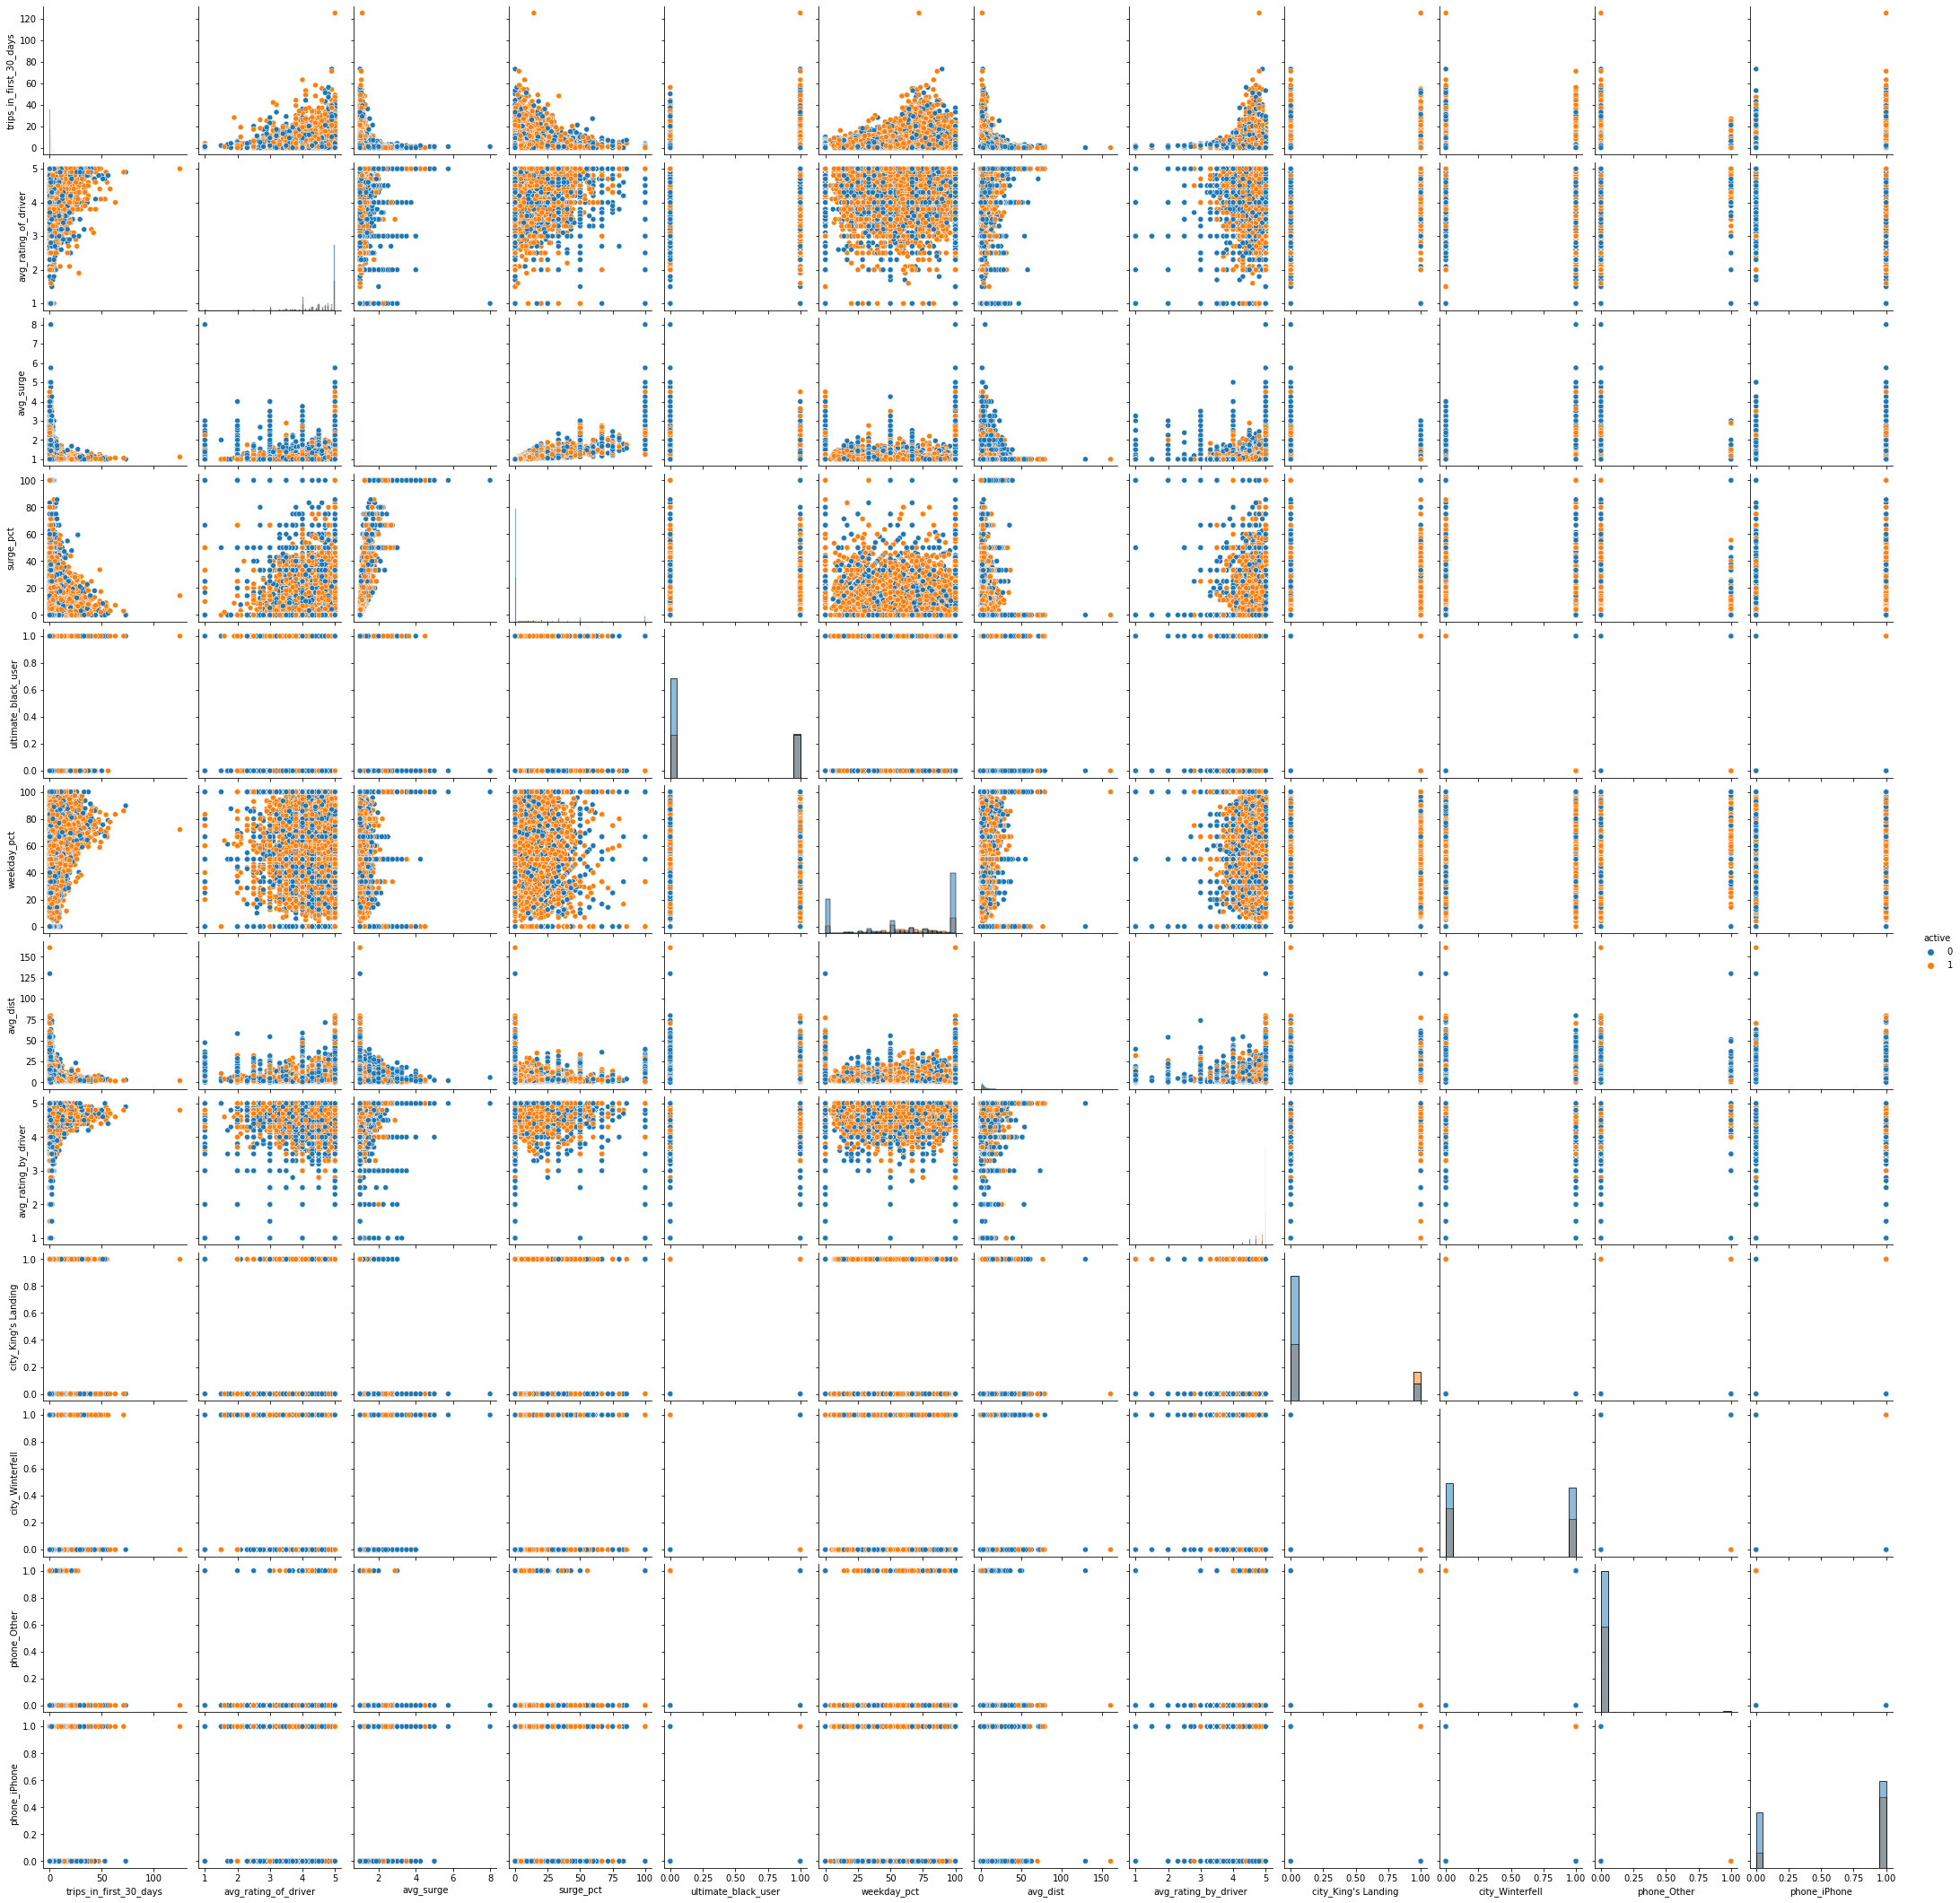

In [62]:
# Running pairplot for DataFrame
sns.pairplot(df, hue='active', diag_kind='hist') 
plt.show()

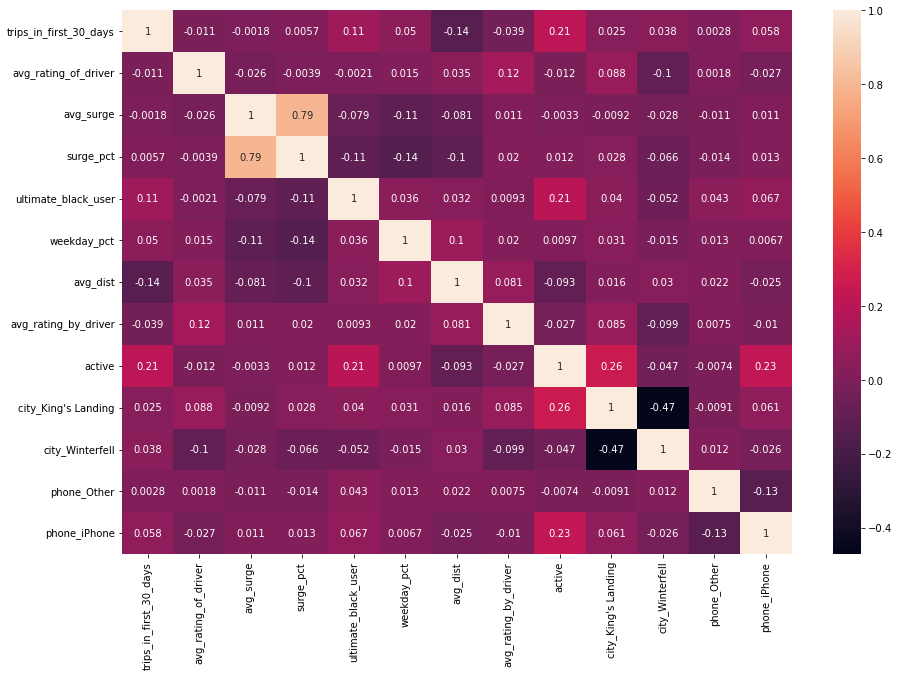

In [63]:
# Running heatmap of correlations
corr_act = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_act, annot=True)
plt.show()

The most apparent correlation in the heatmap is that between 'avg_surge' and 'surge_pct' which has a value of 0.79. This makes sense considering how one is derived from the other. Other correlations in the dataset are much weaker with the exception of 'city_King's Landing and city_Winterfell (correlation at -0.47), which might be due to similar user activities.

Out of all the columns, 'trips_in_first_30_days', 'ultimate_black_user', 'city_King's Landing', and 'phone_iPhone' has the largest correlation to 'active' users.

For the first two, this make sense as clients who are frequently trips with Ulimate and desires a premium service from Ultimate to be correlate to 'active' users.

The correlation seems less apparent for 'city_King's Landing' and 'phone_iPhone'.

It is possible that the kind of service provide King's Landing makes it more attractive to 'active' users or that the location itself has more users that are more 'active' than the other locations. It would be difficult to speculate without further data.

As for 'phone_iPhone' being more correlated that 'phone_Other', it's also possible that there are software differences which makes the service more attractive on an iPhone than on other devices or that the service itself was originally on iPhone to begin with, but started to branch out only recently to other OS, which would also make sense consider the large portion of iOS users under 'phone' previously compared to other users. This too need additional data if we wish to spectate on this.

While we still might need to work on missing numerical data for 'avg_rating_of_driver' and 'avg_rating_by_driver', we could start on a simple model for retention using just these four correlated variables. If the model fails to produce reasonable results, we could start to bring in additional variables.

In [64]:
# Isolating DataFrame to just our target 'active' and its 4 correlated variables
df_mini = df[['active', 'trips_in_first_30_days','ultimate_black_user',
              "city_King's Landing",'phone_iPhone']]
df_mini.head()

,active,trips_in_first_30_days,ultimate_black_user,city_King's Landing,phone_iPhone
0,1,4,1,1,1
1,0,0,0,0,0
2,0,3,0,0,1
3,1,9,1,1,1
4,0,14,0,0,0


In [65]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   active                  50000 non-null  int64
 1   trips_in_first_30_days  50000 non-null  int64
 2   ultimate_black_user     50000 non-null  int64
 3   city_King's Landing     50000 non-null  uint8
 4   phone_iPhone            50000 non-null  uint8
dtypes: int64(3), uint8(2)
memory usage: 1.2 MB


In [66]:
# We'll start building our simple model by setting our target labels as y
# and our variables as X
X = df_mini[['trips_in_first_30_days','ultimate_black_user',
            "city_King's Landing",'phone_iPhone']]
y = df_mini['active']

In [67]:
# Splitting our dataset for training and testing using train_test_split
from sklearn.model_selection import train_test_split

# We'll use a 80:20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2,
                                                    random_state=7)

In [68]:
# Checking shape of training/test data
print('Training data:')
print(X_train.shape)
print(y_train.shape)
print('Test data:')
print(X_test.shape)
print(y_test.shape)

Training data:
(40000, 4)
(40000,)
Test data:
(10000, 4)
(10000,)


In [69]:
# Checking number of non-active and active users in training/test sets
print('Training data:')
print("Non-active: ", list(y_train).count(0))
print("Active: ", list(y_train).count(1))
print('Test data:')
print("Non-active: ", list(y_test).count(0))
print("Active: ", list(y_test).count(1))

Training data:
Non-active:  24852
Active:  15148
Test data:
Non-active:  6344
Active:  3656


For our classifiers, we'll try out 3 different models: Logistic Regression, Random Forest, and Gradient Boosting. Each classifier will also have their hyperparameters fine-tuned using GridSearchCV. We'll also use the default value for cross-validation in GridSearchCV (which is a 5-fold cross-validation). The best parameters will be used for testing and evaluation.

In [72]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing tuning methods for hyperparameters
from sklearn.model_selection import GridSearchCV

# Importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [73]:
# Initalizing test models
logreg = LogisticRegression(random_state=7)
randfor = RandomForestClassifier(random_state=7)
gradboost = GradientBoostingClassifier(random_state=7)

In [74]:
# Hyperparameter space for logreg
logreg_C = [100, 10, 1.0, 0.1, 0.01]
logreg_solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
logreg_params = {'C':logreg_C,'solver':logreg_solver}

# Searching for optimal hyperparameters
logreg_CV = GridSearchCV(logreg, logreg_params, scoring='accuracy', return_train_score=True)
logreg_CV.fit(X_train, y_train)
print(logreg_CV.best_params_)
print(logreg_CV.best_score_)

{'C': 0.01, 'solver': 'liblinear'}
0.717875


              precision    recall  f1-score   support

  Non-Active       0.73      0.87      0.80      6344
      Active       0.67      0.45      0.54      3656

    accuracy                           0.72     10000
   macro avg       0.70      0.66      0.67     10000
weighted avg       0.71      0.72      0.70     10000

Test Accuracy: 71.88%


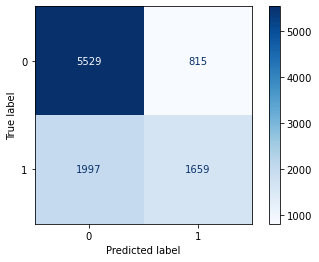

In [75]:
# Loading best parameters
logreg = LogisticRegression(C=0.01, solver='liblinear', random_state=7)

# Fitting model
logreg.fit(X_train, y_train)

# Testing model
y_pred = logreg.predict(X_test)

# Measuring model performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

target_names = ["Non-Active", "Active"]
print(classification_report(y_test, y_pred, target_names=target_names))
print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

The Logistic Regression model appears to do quite well on identifying 'non-active' users as opposed to 'active' users as shown from the high recall score. It's much harder to identify active users. Overall, it has an accuracy of around 72%.

In [76]:
# Hyperparameter space for randfor
randfor_n_est = [n for n in range(100, 501, 100)]
randfor_crit = ['entropy', 'gini']
randfor_max_depth = [depth for depth in range(2, 6)]
randfor_params = {'n_estimators':randfor_n_est, 'criterion':randfor_crit, 'max_depth':randfor_max_depth}

# Searching for optimal hyperparameters
randfor_CV = GridSearchCV(randfor, randfor_params, scoring='accuracy', return_train_score=True)
randfor_CV.fit(X_train, y_train)
print(randfor_CV.best_params_)
print(randfor_CV.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300}
0.7222500000000001


              precision    recall  f1-score   support

  Non-Active       0.76      0.83      0.79      6344
      Active       0.64      0.54      0.59      3656

    accuracy                           0.72     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.72      0.72      0.72     10000

Test Accuracy: 72.21%


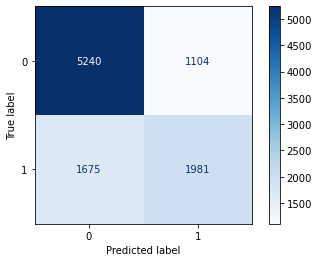

In [77]:
# Loading best parameters
randfor = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=5, random_state=7)

# Fitting model
randfor.fit(X_train, y_train)

# Testing model
y_pred = randfor.predict(X_test)

# Measuring model performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

target_names = ["Non-Active", "Active"]
print(classification_report(y_test, y_pred, target_names=target_names))
print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

Compared to the Logistic Regression model, Random Forest appears improve slightly on recalling 'active' users, but performed slightly worse when it comes to recalling 'non-active' users. Overall, both model's accuracy is comparable.

In [78]:
# Hyperparameter space for gradboost
gradboost_learn_rate = [0.001, 0.01, 0.1]
gradboost_n_est = [n for n in range(100, 501, 100)]
gradboost_max_depth = [depth for depth in range(2, 6)]
gradboost_params = {'learning_rate':gradboost_learn_rate, 'n_estimators':gradboost_n_est, 'max_depth':gradboost_max_depth}

# Searching for optimal hyperparameters
gradboost_CV = GridSearchCV(gradboost, gradboost_params, scoring='accuracy', return_train_score=True)
gradboost_CV.fit(X_train, y_train)
print(gradboost_CV.best_params_)
print(gradboost_CV.best_score_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}
0.724325


              precision    recall  f1-score   support

  Non-Active       0.75      0.85      0.80      6344
      Active       0.66      0.52      0.58      3656

    accuracy                           0.73     10000
   macro avg       0.71      0.68      0.69     10000
weighted avg       0.72      0.73      0.72     10000

Test Accuracy: 72.73%


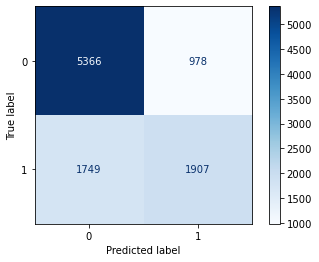

In [79]:
# Loading best parameters
gradboost = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=4, random_state=7)

# Fitting model
gradboost.fit(X_train, y_train)

# Testing model
y_pred = gradboost.predict(X_test)

# Measuring model performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

target_names = ["Non-Active", "Active"]
print(classification_report(y_test, y_pred, target_names=target_names))
print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

Similar to Random Forest, Gradient Boosting provides a model that improves the recall of 'active' users. However, unlike Random Forest, the recall for 'non-active' users are not as bad. Overall, the model achieves an accuracy of roughly 73%.

Given the fact that the scaling for 'trips_in_first_30_days' is much larger than boolean integers, we could check to see if scaling the data would provide any noticable improvement. For our purposes, we'll use the MinMaxScaler from sklearn.

In [84]:
# Importing scaling methods for preprocessing
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df_mini)

In [89]:
# Reforming DataFrame
df_columns = list(df_mini.columns)
df_mini_scaled = pd.DataFrame(data_scaled, columns=df_columns)
df_mini_scaled.head()

,active,trips_in_first_30_days,ultimate_black_user,city_King's Landing,phone_iPhone
0,1.0,0.032,1.0,1.0,1.0
1,0.0,0.000,0.0,0.0,0.0
2,0.0,0.024,0.0,0.0,1.0
3,1.0,0.072,1.0,1.0,1.0
4,0.0,0.112,0.0,0.0,0.0


In [90]:
df_mini_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   active                  50000 non-null  float64
 1   trips_in_first_30_days  50000 non-null  float64
 2   ultimate_black_user     50000 non-null  float64
 3   city_King's Landing     50000 non-null  float64
 4   phone_iPhone            50000 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


In [91]:
# We'll split our data again, but for the scaled data
X = df_mini_scaled[['trips_in_first_30_days','ultimate_black_user',
                    "city_King's Landing",'phone_iPhone']]
y = df_mini_scaled['active']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2,
                                                    random_state=7)

In [92]:
# Initalizing test models
logreg = LogisticRegression(random_state=7)
randfor = RandomForestClassifier(random_state=7)
gradboost = GradientBoostingClassifier(random_state=7)

In [93]:
# Hyperparameter space for logreg
logreg_C = [100, 10, 1.0, 0.1, 0.01]
logreg_solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
logreg_params = {'C':logreg_C,'solver':logreg_solver}

# Searching for optimal hyperparameters
logreg_CV = GridSearchCV(logreg, logreg_params, scoring='accuracy', return_train_score=True)
logreg_CV.fit(X_train, y_train)
print(logreg_CV.best_params_)
print(logreg_CV.best_score_)

{'C': 10, 'solver': 'newton-cg'}
0.7177


              precision    recall  f1-score   support

  Non-Active       0.73      0.87      0.80      6344
      Active       0.67      0.45      0.54      3656

    accuracy                           0.72     10000
   macro avg       0.70      0.66      0.67     10000
weighted avg       0.71      0.72      0.70     10000

Test Accuracy: 71.89%


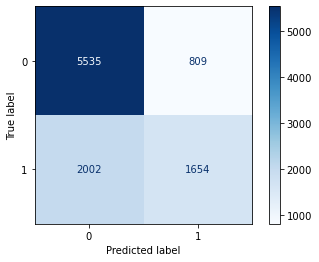

In [94]:
# Loading best parameters
logreg = LogisticRegression(C=10, solver='newton-cg', random_state=7)

# Fitting model
logreg.fit(X_train, y_train)

# Testing model
y_pred = logreg.predict(X_test)

# Measuring model performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

target_names = ["Non-Active", "Active"]
print(classification_report(y_test, y_pred, target_names=target_names))
print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

For Logistic Regression, the effects of scaling for this case is negligible.

In [95]:
# Hyperparameter space for randfor
randfor_n_est = [n for n in range(100, 501, 100)]
randfor_crit = ['entropy', 'gini']
randfor_max_depth = [depth for depth in range(2, 6)]
randfor_params = {'n_estimators':randfor_n_est, 'criterion':randfor_crit, 'max_depth':randfor_max_depth}

# Searching for optimal hyperparameters
randfor_CV = GridSearchCV(randfor, randfor_params, scoring='accuracy', return_train_score=True)
randfor_CV.fit(X_train, y_train)
print(randfor_CV.best_params_)
print(randfor_CV.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300}
0.7222500000000001


              precision    recall  f1-score   support

  Non-Active       0.76      0.83      0.79      6344
      Active       0.64      0.54      0.59      3656

    accuracy                           0.72     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.72      0.72      0.72     10000

Test Accuracy: 72.21%


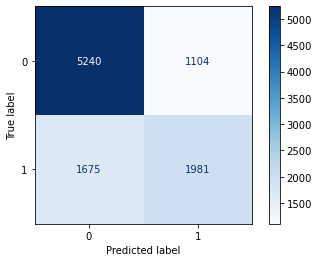

In [96]:
# Loading best parameters
randfor = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=5, random_state=7)

# Fitting model
randfor.fit(X_train, y_train)

# Testing model
y_pred = randfor.predict(X_test)

# Measuring model performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

target_names = ["Non-Active", "Active"]
print(classification_report(y_test, y_pred, target_names=target_names))
print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

For Random Forest, the effects of scaling for this case is negligible.

In [97]:
# Hyperparameter space for gradboost
gradboost_learn_rate = [0.001, 0.01, 0.1]
gradboost_n_est = [n for n in range(100, 501, 100)]
gradboost_max_depth = [depth for depth in range(2, 6)]
gradboost_params = {'learning_rate':gradboost_learn_rate, 'n_estimators':gradboost_n_est, 'max_depth':gradboost_max_depth}

# Searching for optimal hyperparameters
gradboost_CV = GridSearchCV(gradboost, gradboost_params, scoring='accuracy', return_train_score=True)
gradboost_CV.fit(X_train, y_train)
print(gradboost_CV.best_params_)
print(gradboost_CV.best_score_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}
0.724325


              precision    recall  f1-score   support

  Non-Active       0.75      0.85      0.80      6344
      Active       0.66      0.52      0.58      3656

    accuracy                           0.73     10000
   macro avg       0.71      0.68      0.69     10000
weighted avg       0.72      0.73      0.72     10000

Test Accuracy: 72.73%


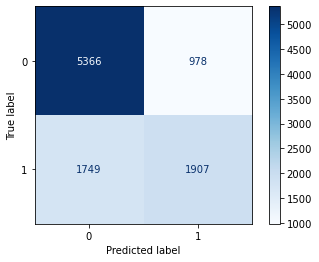

In [98]:
# Loading best parameters
gradboost = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=4, random_state=7)

# Fitting model
gradboost.fit(X_train, y_train)

# Testing model
y_pred = gradboost.predict(X_test)

# Measuring model performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

target_names = ["Non-Active", "Active"]
print(classification_report(y_test, y_pred, target_names=target_names))
print("Test Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))

For Gradient Boosting, the effects of scaling for this case is negligible.

Of the three models that we have tested, Gradient Boosting appears to provide the best performance overall (with around 73% accuracy) from our chosen variables. All three model appears to have difficulty predicting 'active' users, however, compared to 'non-active' users. But, that's not necessarily a bad thing as the high recall rates for the model for 'non-active' users is something that could be exploited. In fact, we could use this model to see what 'non-active' users have in common.

We could, for example, use this model to found what 'non-active' users have in common when the prediction is true and what traits or behavior causes the prediction to fail. We can boost retention rates by learning what causes users to become 'non-active' in the first place.